In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from time import time, strftime

depth = 2
module_path = os.path.abspath('.')
sys.path.append(module_path)
for d in xrange(depth):
    module_path = os.path.abspath(os.path.join(module_path, '..'))
    if module_path not in sys.path:
        sys.path.append(module_path)

In [3]:
% matplotlib inline
from matplotlib import pylab as pl

import seaborn as sns
import pandas as pd

In [4]:
# define paths
base_path = os.path.join(os.path.expanduser('~'), 'freqtrade')
ml_path = os.path.join(base_path, 'ml_dev')
data_path = os.path.join(ml_path, 'data')

In [5]:
# define exchange and market
exchange = 'hitbtc'
market = 'BCHBTC'

In [6]:
# load in data
df = pd.read_csv(os.path.join(data_path, exchange, market, 'master', 'master.csv'))  # 'master.csv'

In [7]:
# get low-ask_diff and high-bid_diff
df['low-ask'] = (df['low'] - df['ask']) / df['ask'] * 100
df['high-bid'] = (df['high'] - df['bid']) / df['bid'] * 100

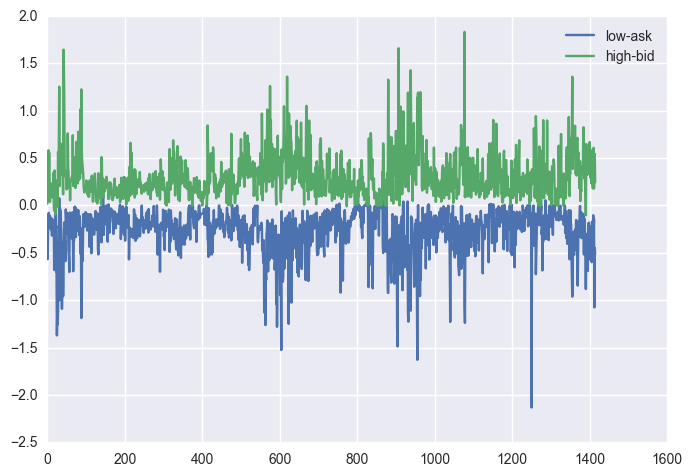

In [8]:
pl.plot(df['low-ask'], label='low-ask')
pl.plot(df['high-bid'], label='high-bid')
pl.legend()

In [18]:
# define thresholds
buy_down = -0.25
sell_up = 0.2

In [19]:
# get potential buy-at and sell-at
df['buy-at'] = df['ask'] + (df['ask'] * buy_down / 100.)
df['sell-at'] = df['bid'] + (df['bid'] * sell_up / 100.)

In [20]:
# import progressbar

# # get potential gain
# bar = progressbar.ProgressBar()
# df['potential-gain'] = 0
# for i in bar(range(1, len(df) - 1)):
#     df['potential-gain'][i] = (df['sell-at'][i] - df['buy-at'][i - 1]) / df['buy-at'][i - 1] * 100

In [21]:
def calc_profit(data, fee=0.001):
    
    profit = 0
    buy = 0
    sell = 0
    sell_rate = 0
    for i in range(1, len(data) - 1):
        if buy == 0:
            if df['low'][i] < df['buy-at'][i]:
                buy = df['buy-at'][i]
                sell_rate = df['sell-at'][i + 1]
        else:
            if df['high'][i] > sell_rate:
                sell = sell_rate
                sell_rate = 0
                
        if sell !=0:
            profit = ((sell - buy) / buy * 100) - (fee * 2 * 100)
            buy = 0
            sell = 0
            
    return profit
        

In [22]:
# calculate potential ROI
p = calc_profit(df)

In [24]:
print('percent ROI: %{}'.format(p))

percent ROI: %0.287256264825
